In [1]:
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

#per ignorare warnings
import warnings
warnings.filterwarnings('ignore')

#libreria per calcolo entropia
from scipy.stats import entropy

#libreria per calcolo Calinski-Harabasz score
from sklearn.metrics import calinski_harabasz_score

#libreria per calcolo davies_bouldin_score
from sklearn.metrics import davies_bouldin_score

Silhouette Scores:
0.9556902714005553
0.9125714017303547
0.7791209004587456
0.5776682829611391
0.45314161347178444
0.3938395296892253
0.3654369091600005
0.3331416319465817
0.3263877536078658
0.33457549840938167

Entropy Scores:
1.0
1.0
1.0
0.9999740313334506
0.9986030202378096
0.9989581233509568
0.9997662707810439
0.99971144175281
0.9972253609153701
0.9989581233509568

Calinski Harabasz Scores:
200748.90628431487
51289.256489319145
8115.508628188312
2144.984250216686
1142.205927628828
809.4719713737395
698.127805760058
588.3782128975995
538.1922398796016
591.1164665851021

Davies-Bouldin Scores:
0.06264087772954563
0.12349545171718598
0.3130581035338171
0.609216229951625
0.827364256602022
0.979944357271371
1.0549738580266437
1.143381041509678
1.1873953087088953
1.151886121595111


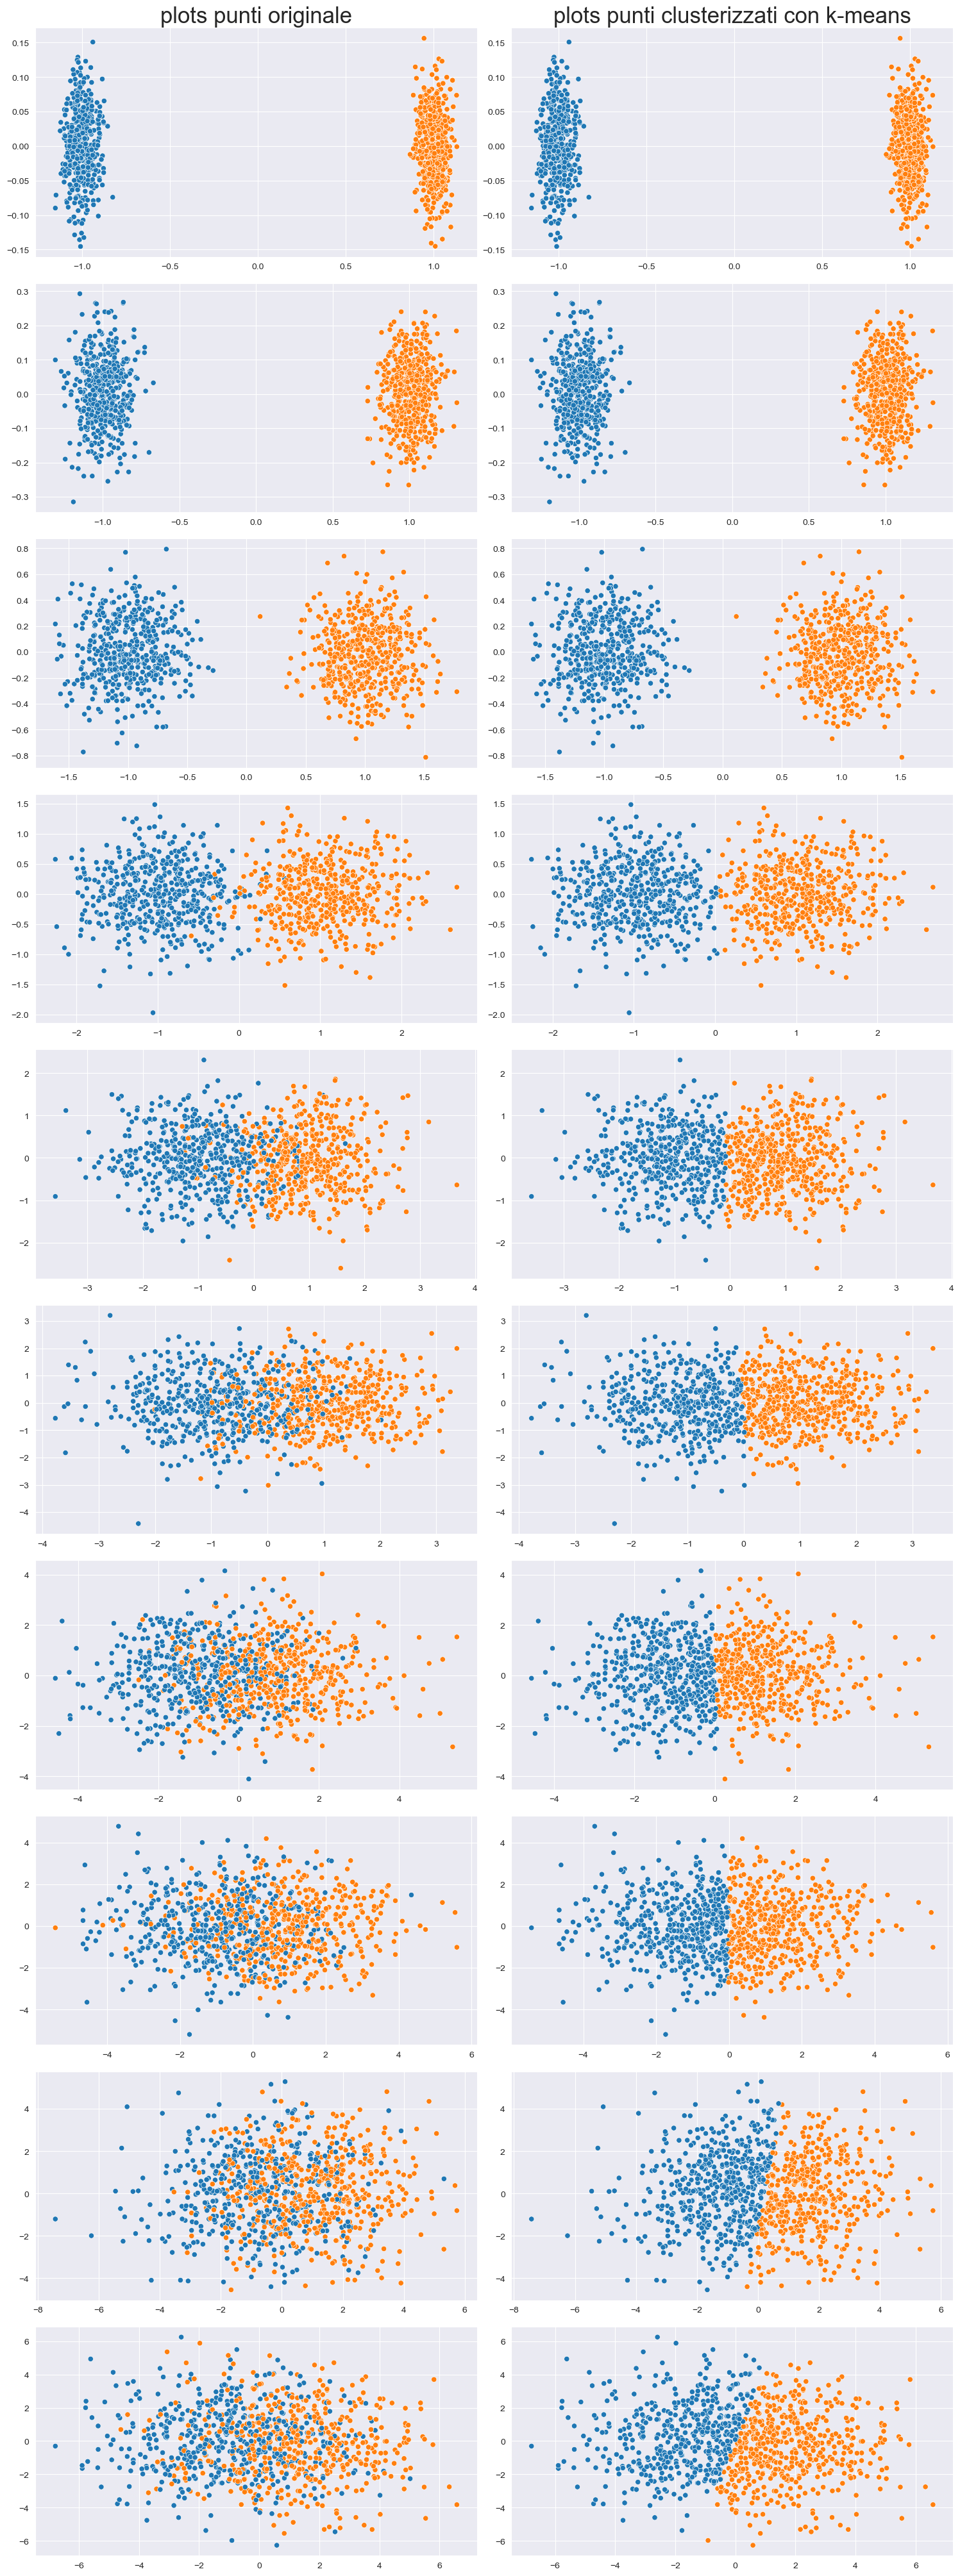

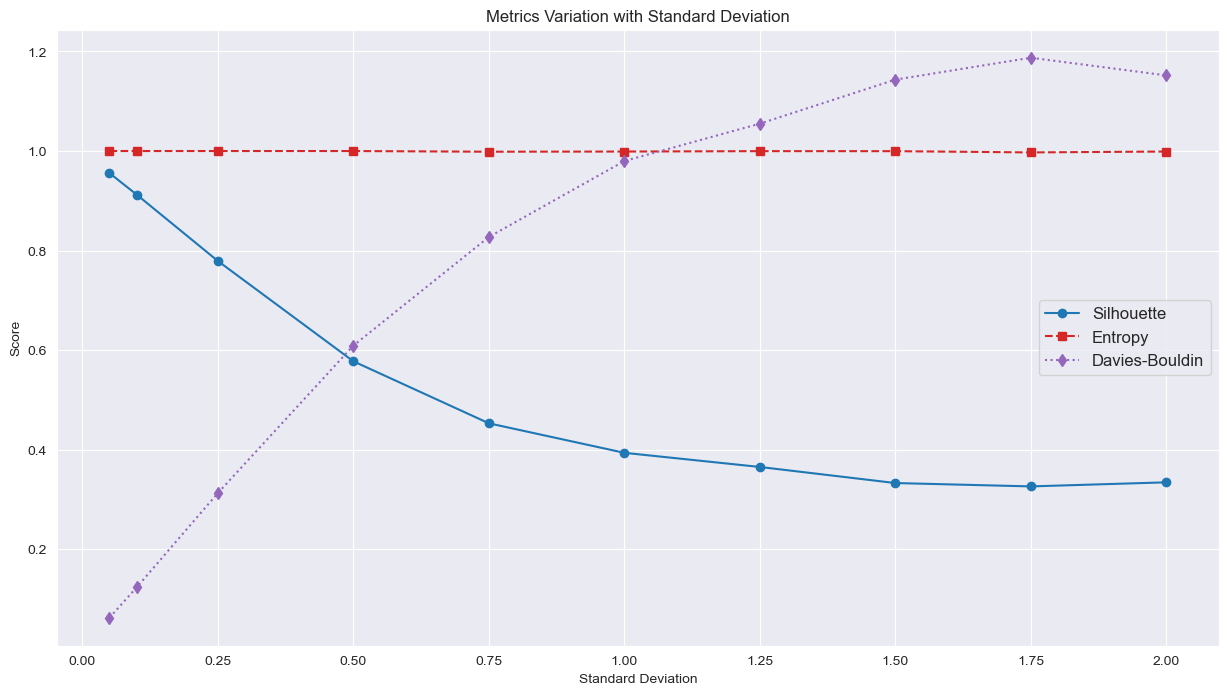

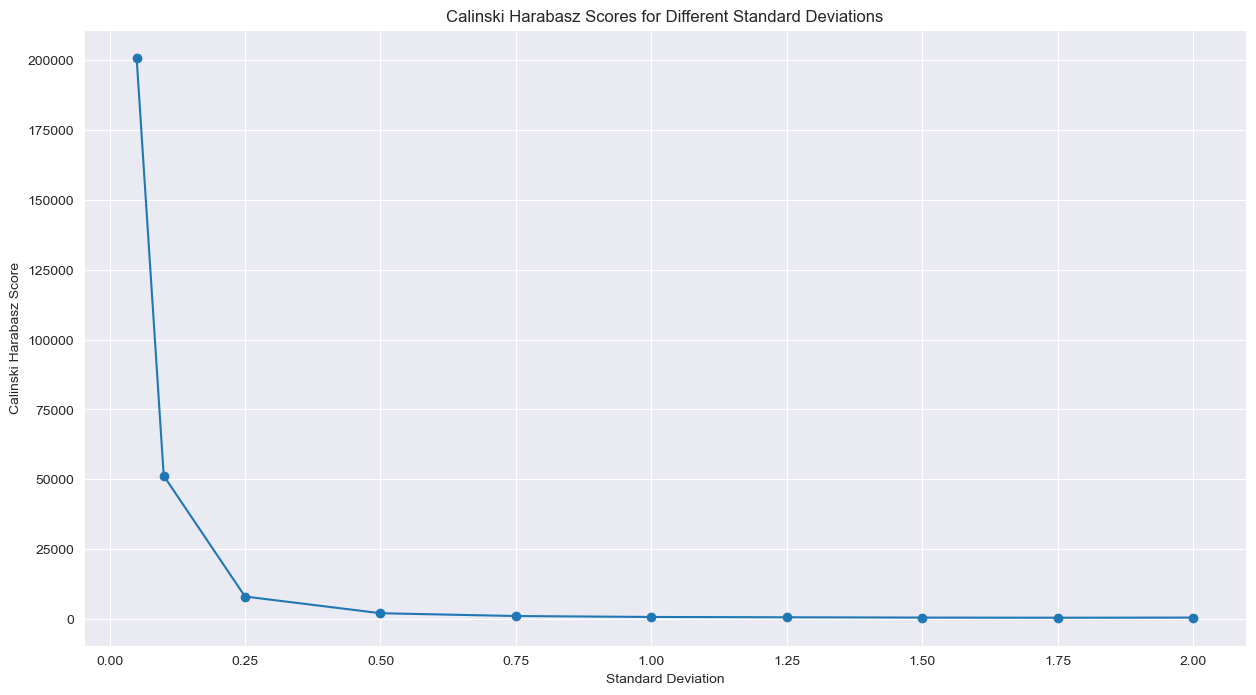

In [17]:
# Array per i valori delle metriche
silhouette_scores = []  
entropy_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

#deviazione standard
sds = [0.05, 0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

fig, axs = plt.subplots(10,2, figsize=(15,40))
sns.set_style("darkgrid")
fig.tight_layout()

r = 0
c = 0
c2= 1

for s in sds:
    X, y = make_blobs(n_samples=1000, centers=[[-1,0],[1,0]], cluster_std=s)
    if r==0:
        scatter=sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, ax=axs[r,c])
        scatter.set_title('plots punti originale', fontsize=25)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, ax=axs[r,c])

    #axs[r,c].set_xticks([])
    #axs[r,c].set_yticks([])
    axs[r,c].get_legend().remove()
    
    data = pd.DataFrame(np.zeros((1000, 3)))
    data.iloc[:, [0,1]] = X
    data.iloc[:, 2] = y
    data.to_csv("cluster_" + str(s) + ".csv")

    km = KMeans(n_clusters=2, n_init=1, random_state=0)
    km.fit(X)
    l = km.labels_
    cs = km.cluster_centers_
    if cs[0,0] > cs[1,0]:
        l = [1 if x == 0 else 0 for x in l]
    
    #calcolo silhouette
    silhouette_avg = silhouette_score(X, l)
    silhouette_scores.append(silhouette_avg)
    
    #calcolo entropia
    entropy_val = entropy(np.bincount(l) / len(l), base=2)
    entropy_scores.append(entropy_val)
    
    #calcolo Calinski-Harabasz index
    calinski_harabasz_index = calinski_harabasz_score(X, l)
    calinski_harabasz_scores.append(calinski_harabasz_index)
    
    # Calcolo Davies-Bouldin
    davies_bouldin_avg = davies_bouldin_score(X, l)
    davies_bouldin_scores.append(davies_bouldin_avg)
    if r==0:
            scatter2=sns.scatterplot(x=X[:,0], y=X[:,1], hue=l, ax=axs[r,c2])
            scatter2.set_title('plots punti clusterizzati con k-means', fontsize=25)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=l, ax=axs[r,c2])

    #axs[c,r].set_xticks([])
    #axs[c,r].set_yticks([])
    axs[r,c2].get_legend().remove()        
    
    r=r+1
    
# Stampa degli array
print("Silhouette Scores:")
for score in silhouette_scores:
    print(score)

print("\nEntropy Scores:")
for score in entropy_scores:
    print(score)
    
print("\nCalinski Harabasz Scores:")
for score in calinski_harabasz_scores:
    print(score)

print("\nDavies-Bouldin Scores:")
for score in davies_bouldin_scores:
    print(score)
    
# Plot delle variazioni di Silhouette, Entropy, Davies-Bouldin
fig, ax1 = plt.subplots(figsize=(15, 8))

# Silhouette
color = 'tab:blue'
ax1.set_xlabel('Standard Deviation')
ax1.set_ylabel('Score')
ax1.plot(sds, silhouette_scores, marker='o', linestyle='-', color=color, label='Silhouette')
ax1.tick_params(axis='y')


# Entropy
color = 'tab:red'
ax1.set_ylabel('Score')
ax1.plot(sds, entropy_scores, marker='s', linestyle='--', color=color, label='Entropy')
ax1.tick_params(axis='y')

# Davies-Bouldin
color = 'tab:purple'
ax1.plot(sds, davies_bouldin_scores, marker='d', linestyle=':', color=color,label='Davies-Bouldin')
ax1.tick_params(axis='y')

# Aggiungi la legenda
ax1.legend(loc='center right', fontsize='large')
plt.title('Metrics Variation with Standard Deviation')
plt.show()

# Plot Calinski Harabasz Scores
plt.figure(figsize=(15, 8))
plt.plot(sds, calinski_harabasz_scores, marker='o')
plt.title('Calinski Harabasz Scores for Different Standard Deviations')
plt.xlabel('Standard Deviation')
plt.ylabel('Calinski Harabasz Score')
plt.grid(True)
plt.show()

fig.savefig("gaussians.png", facecolor="gray")

Silhouette Scores:
0.5231770338185358
0.5236673002637073
0.4969480708783215
0.4321570508701087
0.34851745062320316
0.3438674412652773

Entropy Scores:
0.9775696629057534
0.9593795191444577
0.9482102328088211
0.9333930737612746
0.999107261904943
0.9988339010532259

Calinski Harabasz Scores:
505.69498593279224
454.7914778141793
377.5125634095005
281.0543090934223
238.97790104784772
232.84604101170015

Davies-Bouldin Scores:
0.8043264661462324
0.8398935005109184
0.925802416480313
1.0594174615126835
1.1906110774485672
1.208771499761885


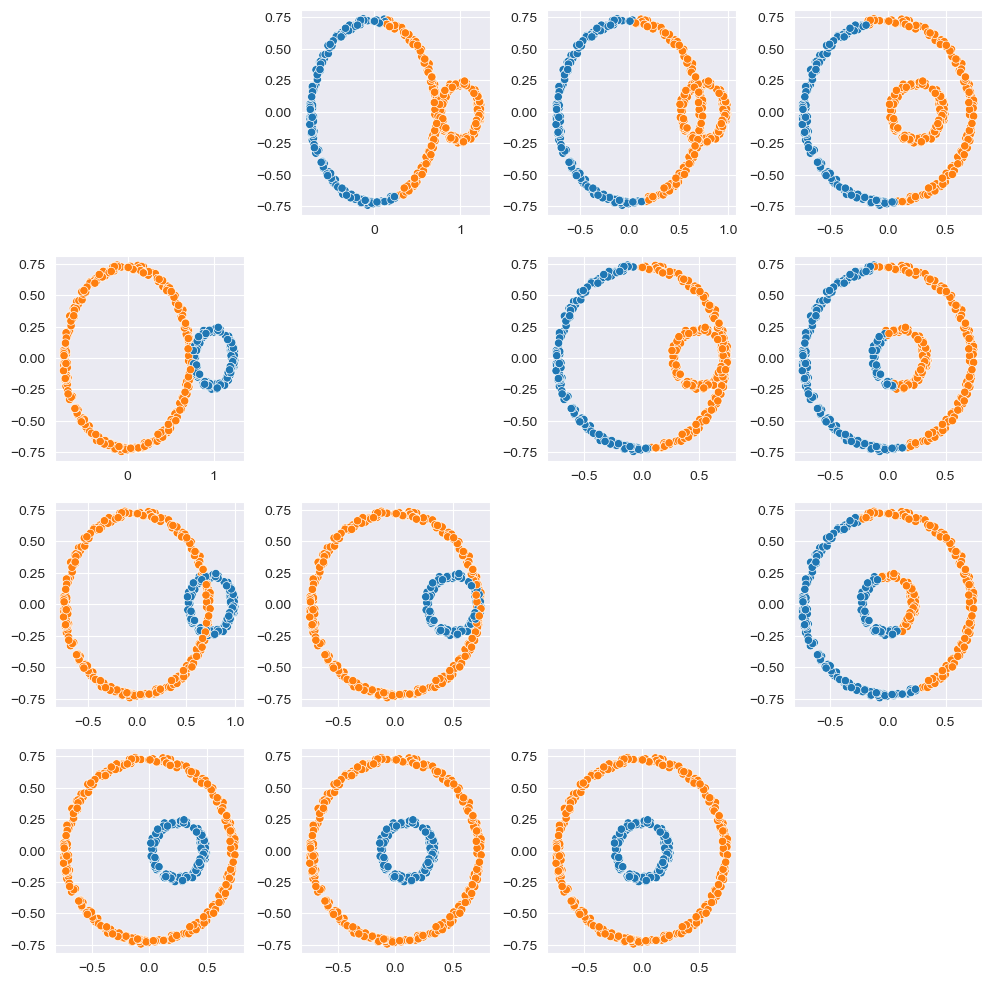

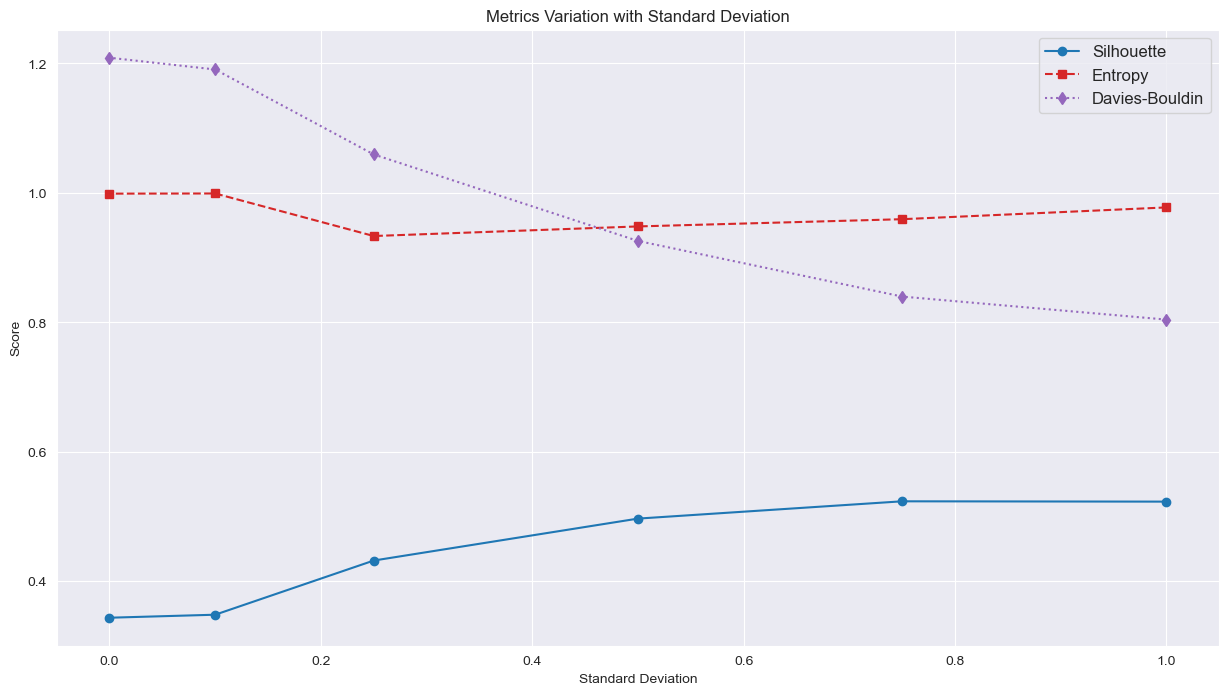

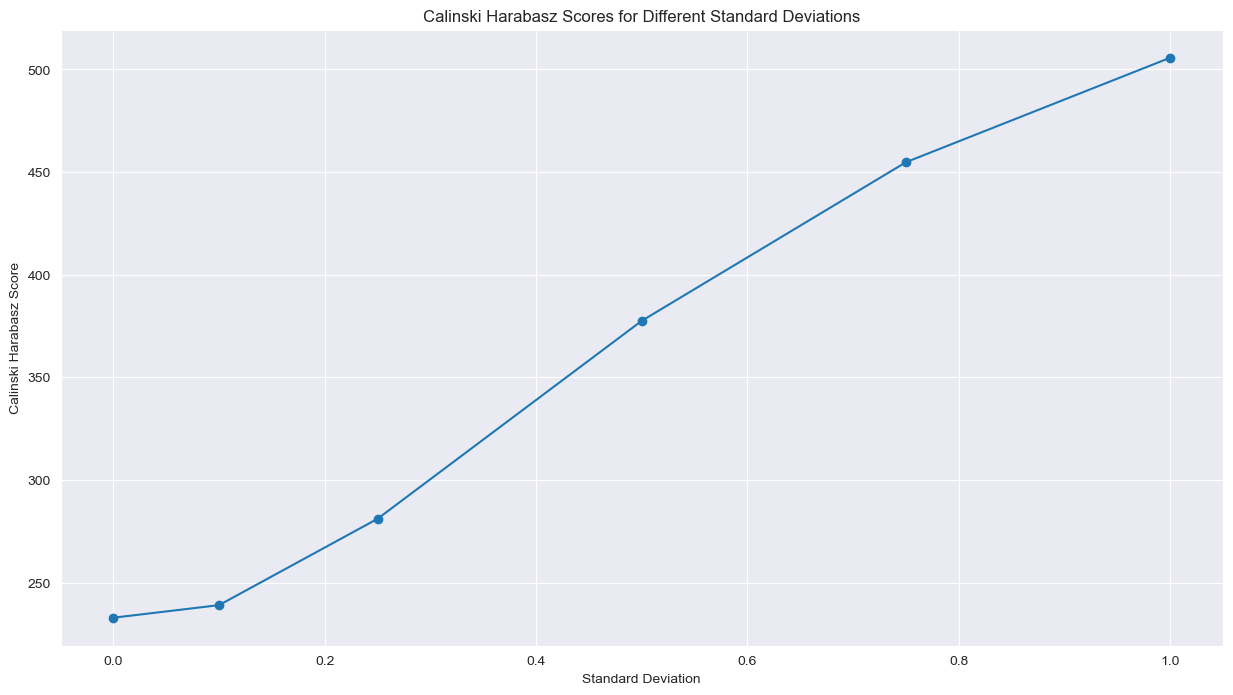

In [3]:
# Array per i valori delle metriche
silhouette_scores = []  
entropy_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

#deviazione standard
sds = np.array([0, 0.1, 0.25, 0.5, 0.75, 1])[::-1]
#print(sds)

fig, axs = plt.subplots(4,4, figsize=(10,10))
sns.set_style("darkgrid")
fig.tight_layout()


r = 1
c = 0



for s in sds:
    #print(s)
    centers = np.array([[s,0],[0,0]])
    
    X, y = make_blobs(n_samples=[1000,10000], centers=centers, cluster_std=[0.25,1], random_state=0)
    
    cond1 = ((0.20**2 <= (X[:,0]-centers[0,0])**2 + (X[:,1] - centers[0,1])**2) & ((X[:,0]-centers[0,0])**2 + (X[:,1] - centers[0,1])**2 <= 0.25**2))
    cond2 = ((0.7**2 <=(X[:,0]-centers[1,0])**2 + (X[:,1] - centers[1,1])**2) & ((X[:,0]-centers[1,0])**2 + (X[:,1] - centers[1,1])**2 <= 0.75**2))
    X_temp = X[((y==0) & cond1) | ((y==1) & cond2)]
    y = y[((y==0) & cond1) | ((y==1) & cond2)]
    X = X_temp
    
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, ax=axs[r,c])

    #axs[r,c].set_xticks([])
    #axs[r,c].set_yticks([])
    axs[r,c].get_legend().remove()
    
    data = pd.DataFrame(np.zeros((X.shape[0], 3)))
    data.iloc[:, [0,1]] = X
    data.iloc[:, 2] = y
    data.to_csv("cluster_" + str(s) + ".csv")

    km = KMeans(n_clusters=2, n_init=1, random_state=0)
    km.fit(X)
    l = km.labels_
    cs = km.cluster_centers_
    if cs[0,0] > cs[1,0]:
        l = [1 if x == 0 else 0 for x in l]
    
    #calcolo silhouette
    silhouette_avg = silhouette_score(X, l)
    silhouette_scores.append(silhouette_avg)
    #print(f"Silhouette Score for cluster_{s}: {silhouette_avg}")
    
    #calcolo entropia
    entropy_val = entropy(np.bincount(l) / len(l), base=2)
    entropy_scores.append(entropy_val)
    #print(f"Entropia Score for cluster_{s}: {entropy_val}")

    
    #calcolo Calinski-Harabasz index
    calinski_harabasz_index = calinski_harabasz_score(X, l)
    calinski_harabasz_scores.append(calinski_harabasz_index)
    #print(f"Calinski-Harabasz Score for cluster_{s}: {calinski_harabasz_index}")

    
    # Calcolo Davies-Bouldin
    davies_bouldin_avg = davies_bouldin_score(X, l)
    davies_bouldin_scores.append(davies_bouldin_avg)
    #print(f"Davies-Bouldin Score for cluster_{s}: {davies_bouldin_avg}")

    
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=l, ax=axs[c,r])

    #axs[c,r].set_xticks([])
    #axs[c,r].set_yticks([])
    axs[c,r].get_legend().remove()
    
    c += 1
    if c >= r:
        c = 0
        r += 1

# Stampa degli array
print("Silhouette Scores:")
for score in silhouette_scores:
    print(score)

print("\nEntropy Scores:")
for score in entropy_scores:
    print(score)
    
print("\nCalinski Harabasz Scores:")
for score in calinski_harabasz_scores:
    print(score)

print("\nDavies-Bouldin Scores:")
for score in davies_bouldin_scores:
    print(score)        

for k in range(4):
    axs[k,k].remove()
    
# Plot delle variazioni di Silhouette, Entropy, Davies-Bouldin
fig, ax1 = plt.subplots(figsize=(15, 8))

# Silhouette
color = 'tab:blue'
ax1.set_xlabel('Standard Deviation')
ax1.set_ylabel('Score')
ax1.plot(sds, silhouette_scores, marker='o', linestyle='-', color=color, label='Silhouette')
ax1.tick_params(axis='y')


# Entropy
color = 'tab:red'
ax1.set_ylabel('Score')
ax1.plot(sds, entropy_scores, marker='s', linestyle='--', color=color, label='Entropy')
ax1.tick_params(axis='y')

# Davies-Bouldin
color = 'tab:purple'
ax1.plot(sds, davies_bouldin_scores, marker='d', linestyle=':', color=color,label='Davies-Bouldin')
ax1.tick_params(axis='y')

# Aggiungi la legenda
ax1.legend(loc='upper right', fontsize='large')
plt.title('Metrics Variation with Standard Deviation')
plt.show()

# Plot Calinski Harabasz Scores
plt.figure(figsize=(15, 8))
plt.plot(sds, calinski_harabasz_scores, marker='o')
plt.title('Calinski Harabasz Scores for Different Standard Deviations')
plt.xlabel('Standard Deviation')
plt.ylabel('Calinski Harabasz Score')
plt.grid(True)
plt.show()

fig.savefig("circles.png", facecolor="gray")

Silhouette Scores:
0.7410433757635494
0.5969539064119309
0.5132924135975624
0.44878404550548207
0.35468448047956147
0.37928517392162875

Entropy Scores:
0.9999974231054926
0.9999954918323951
0.9999991162637836
0.9999985335635064
0.9999954643605901
0.9999951086605922

Calinski Harabasz Scores:
59989.12310297131
63102.4340369486
60786.361163289774
57885.35385370727
58767.409027178015
84759.06340355467

Davies-Bouldin Scores:
0.39911899475770485
0.657003858928759
0.8167095508369501
0.939591405959272
1.1341107041282812
1.0390269756295487


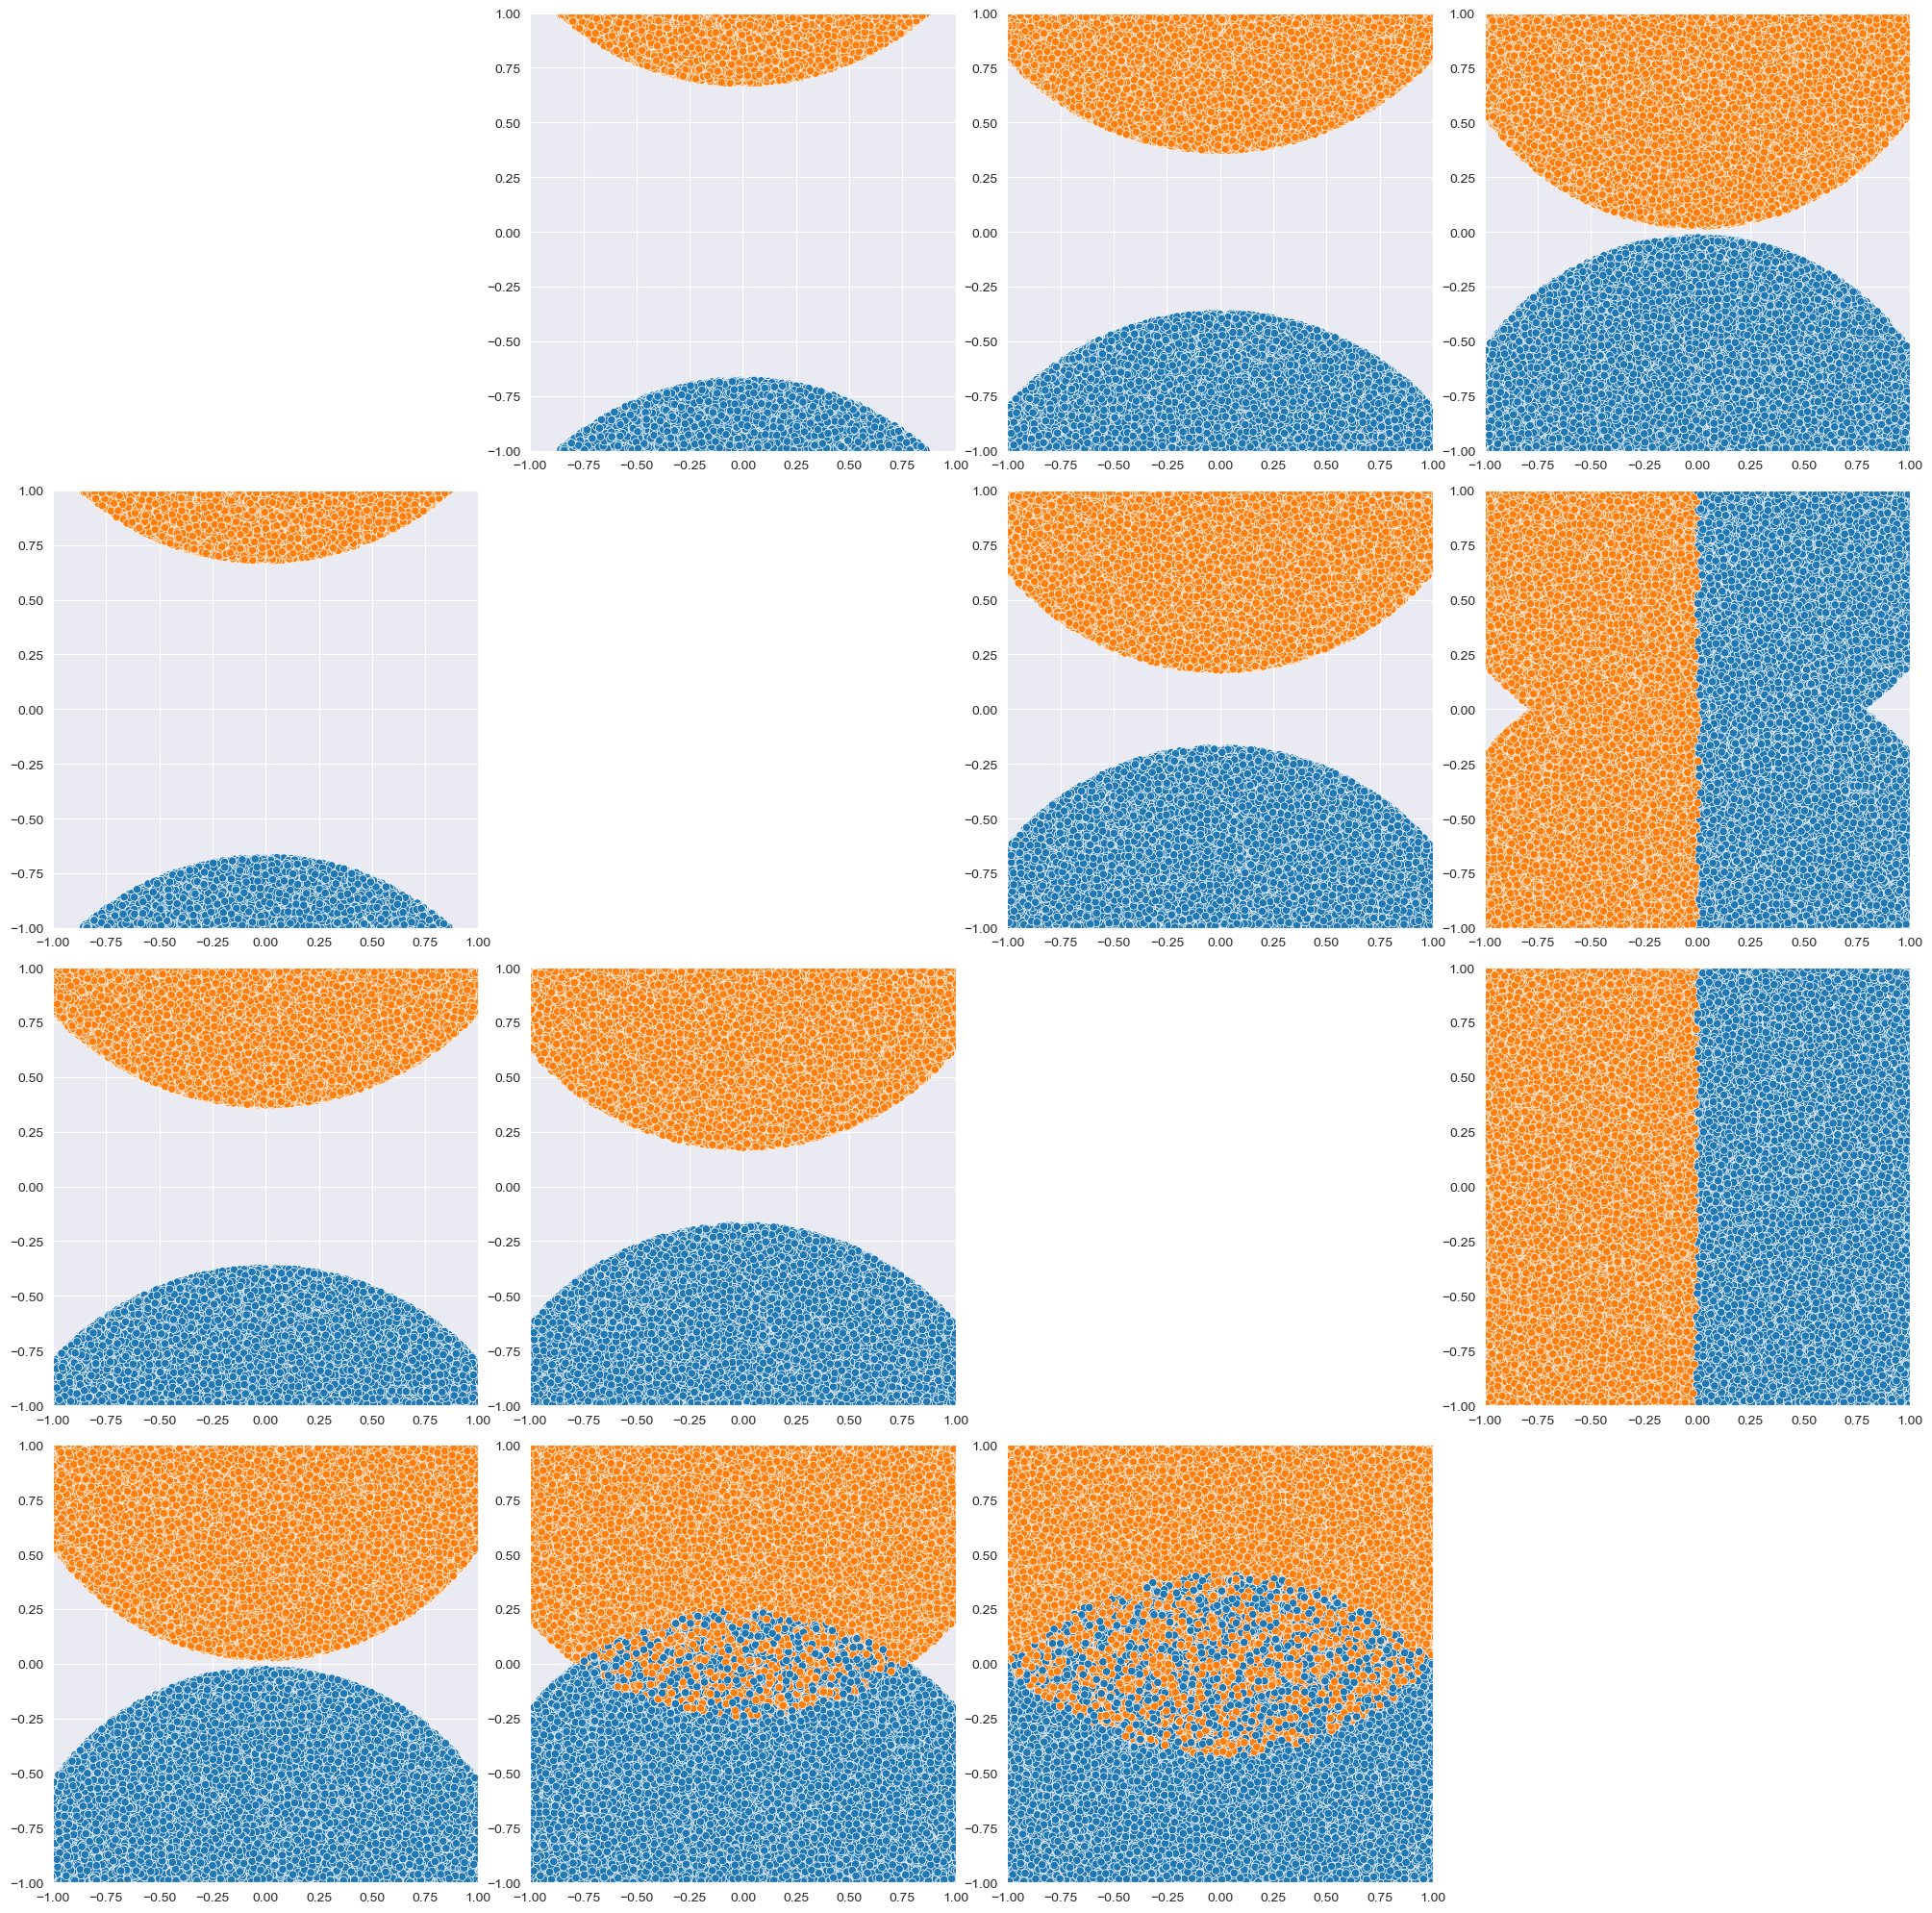

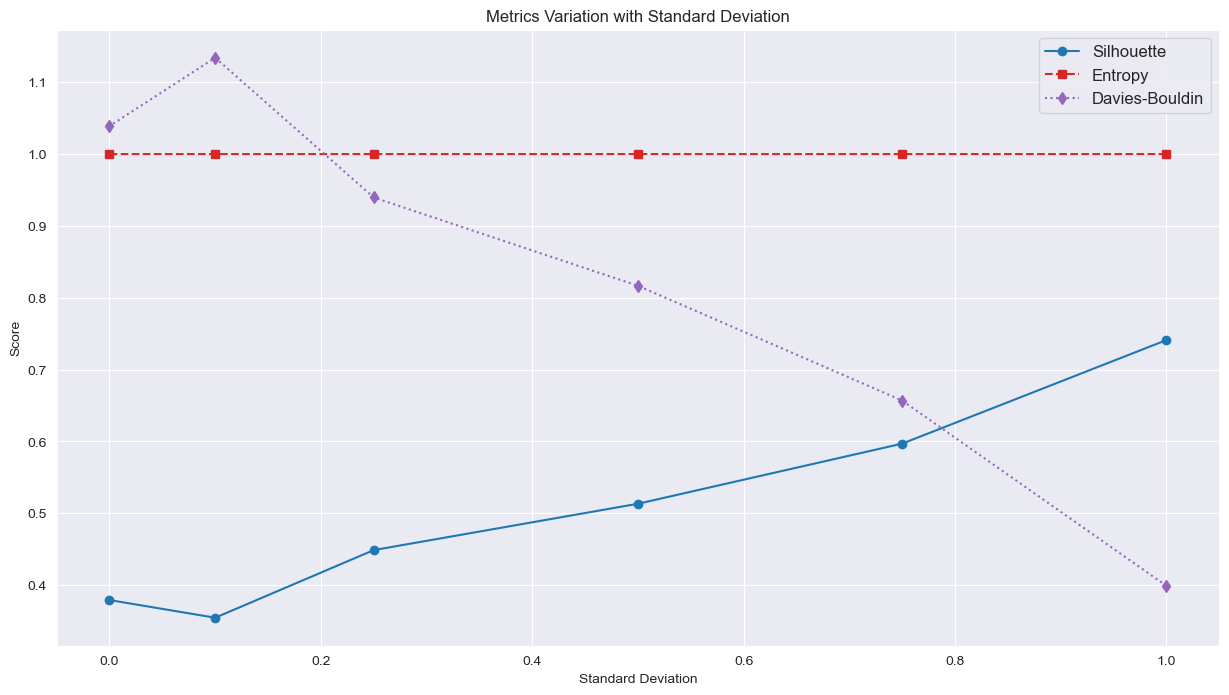

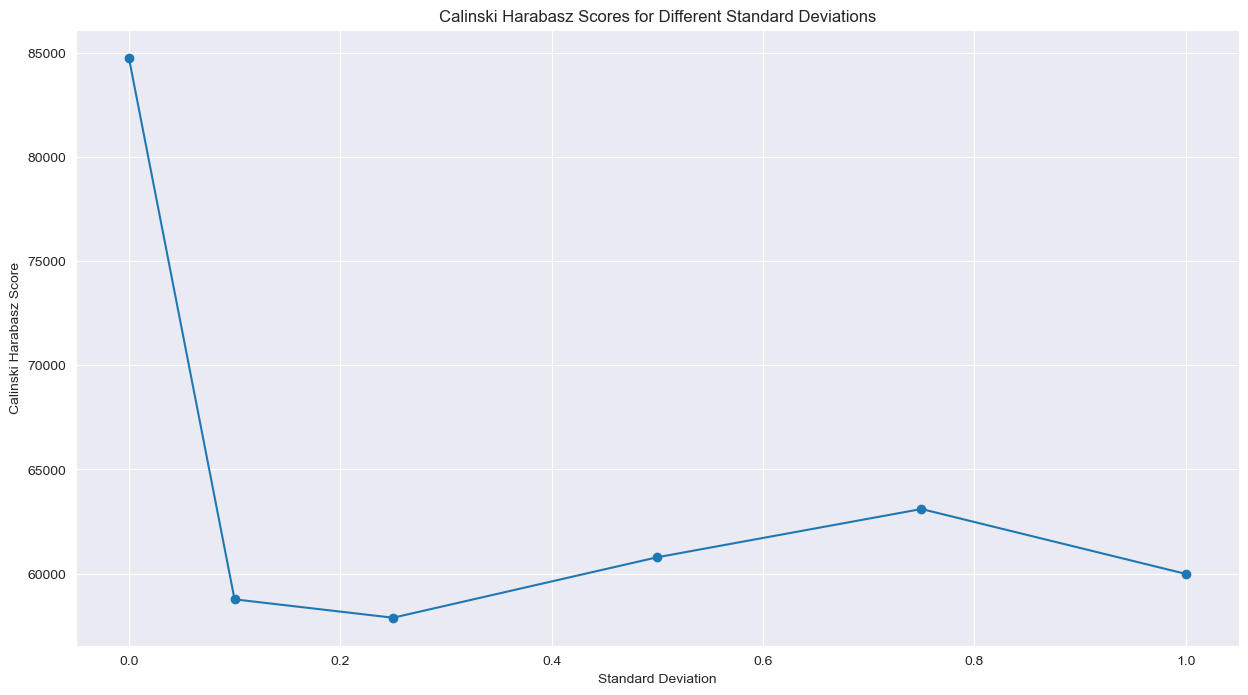

In [91]:
# Array per i valori delle metriche
silhouette_scores = []  
entropy_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

#deviazione standard
cds = [2, 1.75, 1.5, 1.25, 1.1, 1]
rs = [1.75, 1.9, 1.75, 1.5, 1.8, 2]

fig, axs = plt.subplots(4,4, figsize=(20,20))
sns.set_style("darkgrid")
fig.tight_layout()


r = 1
c = 0

for i,s in enumerate(cds):
    centers = np.array([[0,-s],[0,s]])
    X, y = make_blobs(n_samples=1000000, centers=centers, cluster_std=2)

    cond1 = (((X[:,0]-0)**2 + (X[:,1] - (-s))**2) <= rs[i])
    cond2 = (((X[:,0]-0)**2 + (X[:,1] - s)**2) <= rs[i])
    X_temp = X[(((cond1) & (y == 0)) | ((cond2) & (y == 1))) & (np.abs(X[:,1]) <= 1)]
    y = y[(((cond1) & (y == 0)) | ((cond2) & (y == 1))) & (np.abs(X[:,1]) <= 1)]
    X = X_temp

    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, ax=axs[r,c])

    axs[r,c].set_xlim(-1,1)
    axs[r,c].set_ylim(-1,1)
    #axs[r,c].set_xticks([])
    #axs[r,c].set_yticks([])
    axs[r,c].get_legend().remove()
    
    data = pd.DataFrame(np.zeros((X.shape[0], 3)))
    data.iloc[:, [0,1]] = X
    data.iloc[:, 2] = y
    data.iloc[:1000,:].to_csv("circles_cluster_" + str(s) + ".csv")

    km = KMeans(n_clusters=2, n_init=1, random_state=0)
    km.fit(X)
    l = km.labels_
    cs = km.cluster_centers_
    if cs[0,1] > cs[0,0]:
        l = [1 if x == 0 else 0 for x in l]
    
    #calcolo silhouette
    silhouette_avg = silhouette_score(X, l)
    silhouette_scores.append(silhouette_avg)
    #print(f"Silhouette Score for cluster_{s}: {silhouette_avg}")
    
    #calcolo entropia
    entropy_val = entropy(np.bincount(l) / len(l), base=2)
    entropy_scores.append(entropy_val)
    #print(f"Entropia Score for cluster_{s}: {entropy_val}")

    
    #calcolo Calinski-Harabasz index
    calinski_harabasz_index = calinski_harabasz_score(X, l)
    calinski_harabasz_scores.append(calinski_harabasz_index)
    #print(f"Calinski-Harabasz Score for cluster_{s}: {calinski_harabasz_index}")

    # Calcolo Davies-Bouldin
    davies_bouldin_avg = davies_bouldin_score(X, l)
    davies_bouldin_scores.append(davies_bouldin_avg)
    #print(f"Davies-Bouldin Score for cluster_{s}: {davies_bouldin_avg}")
    
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=l, ax=axs[c,r])

    #axs[c,r].set_xticks([])
    #axs[c,r].set_yticks([])
    axs[c,r].set_xlim(-1,1)
    axs[c,r].set_ylim(-1,1)
    axs[c,r].get_legend().remove()
    
    c += 1
    if c >= r:
        c = 0
        r += 1

for k in range(4):
    axs[k,k].remove()
    
# Stampa degli array
print("Silhouette Scores:")
for score in silhouette_scores:
    print(score)

print("\nEntropy Scores:")
for score in entropy_scores:
    print(score)
    
print("\nCalinski Harabasz Scores:")
for score in calinski_harabasz_scores:
    print(score)

print("\nDavies-Bouldin Scores:")
for score in davies_bouldin_scores:
    print(score)        

# Plot delle variazioni di Silhouette, Entropy, Davies-Bouldin
fig, ax1 = plt.subplots(figsize=(15, 8))

# Silhouette
color = 'tab:blue'
ax1.set_xlabel('Standard Deviation')
ax1.set_ylabel('Score')
ax1.plot(sds, silhouette_scores, marker='o', linestyle='-', color=color, label='Silhouette')
ax1.tick_params(axis='y')

# Entropy
color = 'tab:red'
ax1.set_ylabel('Score')
ax1.plot(sds, entropy_scores, marker='s', linestyle='--', color=color, label='Entropy')
ax1.tick_params(axis='y')

# Davies-Bouldin
color = 'tab:purple'
ax1.plot(sds, davies_bouldin_scores, marker='d', linestyle=':', color=color,label='Davies-Bouldin')
ax1.tick_params(axis='y')

# Legenda
ax1.legend(loc='upper right', fontsize='large')
plt.title('Metrics Variation with Standard Deviation')
plt.show()

# Plot Calinski Harabasz Scores
plt.figure(figsize=(15, 8))
plt.plot(sds, calinski_harabasz_scores, marker='o')
plt.title('Calinski Harabasz Scores for Different Standard Deviations')
plt.xlabel('Standard Deviation')
plt.ylabel('Calinski Harabasz Score')
plt.grid(True)
plt.show()    

fig.savefig("circles.png", facecolor="gray")